In [1]:
# Konfigurasi Spark
import os
import sys

# 1. Mengeset variabel yang menyimpan lokasi di mana Spark diinstal
spark_path = "E:/Nanda/KULIAH/bigdata/spark-2.1.0-bin-hadoop2.7"

# 2. Menentukan environment variable SPARK_HOME
os.environ['SPARK_HOME'] = spark_path

# 3. Simpan lokasi winutils.exe sebagai environment variable HADOOP_HOME
os.environ['HADOOP_HOME'] = spark_path

# 4. Lokasi Python yang dijalankan --> punya Anaconda
#    Apabila Python yang diinstall hanya Anaconda, maka tidak perlu menjalankan baris ini.
os.environ['PYSPARK_PYTHON'] = sys.executable

# 5. Konfigurasi path library PySpark
sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.4-src.zip")

# 6. Import library Spark
#    Dua library yang WAJIB di-import adalah **SparkContext** dan **SparkConf**.
from pyspark import SparkContext
from pyspark import SparkConf

# Setting konfigurasi (opsional)
conf = SparkConf()
conf.set("spark.executor.memory", "2g")
conf.set("spark.cores.max", "4")

sc = SparkContext("local", conf=conf)
#    Apabila berhasil, maka ketika sc di-print akan mengeluarkan nilai <pyspark.context.SparkContext object>
print sc

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from math import sqrt

from pyspark.mllib.clustering import KMeans, KMeansModel
# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

In [6]:
services = pd.read_csv('E:/Nanda/KULIAH/bigdata/proyek/ml-latest-small/ratings.csv')

In [7]:
from IPython.display import display, HTML
display(services)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [9]:
NewSort = services.sort_values(['rating'], ascending=[False]).reset_index(drop=True)

In [10]:
from IPython.display import display, HTML
display(NewSort)

,userId,movieId,rating,timestamp
0,242,2929,5.0,956687566
1,265,1233,5.0,960056214
2,337,1356,5.0,1447176421
3,95,3948,5.0,1025556197
4,95,3917,5.0,1019023102
5,460,2020,5.0,1072837101
6,95,3793,5.0,1018816171
7,537,1269,5.0,879503289
8,537,1267,5.0,879503075
9,95,3702,5.0,1016316990


In [11]:
print NewSort['rating'][0]
print NewSort['movieId'][0]

5.0
2929


In [12]:
ratingList = []
movieIdList = []

for i in range (0,10):
    ratingList.append(NewSort['rating'][i])
for i in range (0,10):
    movieIdList.append(str(NewSort['movieId'][i]))


In [13]:
print ratingList

[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


In [14]:
print movieIdList

['2929', '1233', '1356', '3948', '3917', '2020', '3793', '1269', '1267', '3702']


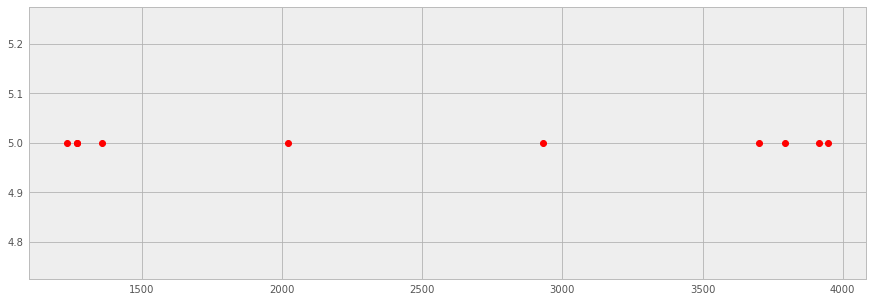

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(movieIdList, ratingList, 'ro')
plt.show()

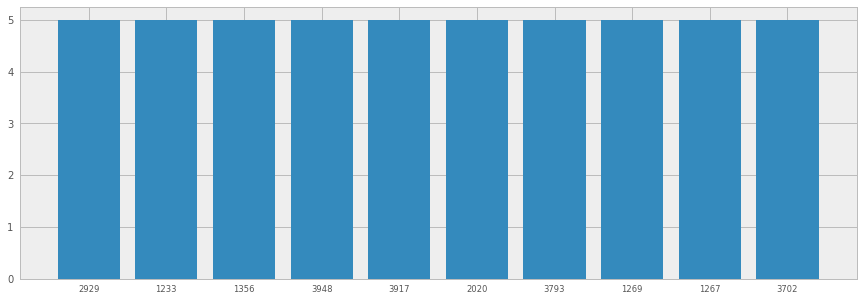

In [16]:
plt.bar(range(len(ratingList)), ratingList, align='center')
plt.xticks(range(len(ratingList)), movieIdList, size='small')
plt.show()

In [17]:
counts = services.groupby('userId').size()

In [18]:
counts

userId
1        20
2        76
3        51
4       204
5       100
6        44
7        88
8       116
9        45
10       46
11       38
12       61
13       53
14       20
15     1700
16       29
17      363
18       51
19      423
20       98
21      162
22      220
23      726
24       21
25       26
26      172
27       23
28       50
29       22
30     1011
       ... 
642      36
643      24
644      39
645      30
646     169
647     150
648     256
649      90
650      29
651      20
652     267
653      51
654     626
655     105
656     128
657      20
658      60
659     142
660      92
661      33
662      58
663      26
664     519
665     434
666      40
667      68
668      20
669      37
670      31
671     115
dtype: int64

In [19]:
type(counts)

pandas.core.series.Series

In [20]:
userCount = counts.tolist()
print userCount

[20L, 76L, 51L, 204L, 100L, 44L, 88L, 116L, 45L, 46L, 38L, 61L, 53L, 20L, 1700L, 29L, 363L, 51L, 423L, 98L, 162L, 220L, 726L, 21L, 26L, 172L, 23L, 50L, 22L, 1011L, 69L, 48L, 138L, 187L, 20L, 104L, 32L, 111L, 62L, 43L, 199L, 70L, 110L, 25L, 21L, 39L, 38L, 513L, 99L, 46L, 31L, 68L, 46L, 44L, 38L, 522L, 209L, 73L, 78L, 55L, 166L, 53L, 97L, 21L, 27L, 49L, 103L, 123L, 81L, 83L, 23L, 191L, 1610L, 49L, 145L, 20L, 315L, 263L, 55L, 37L, 160L, 39L, 161L, 116L, 107L, 190L, 31L, 255L, 66L, 50L, 150L, 123L, 159L, 196L, 299L, 76L, 128L, 71L, 188L, 25L, 55L, 678L, 94L, 76L, 525L, 45L, 32L, 31L, 23L, 120L, 341L, 21L, 27L, 25L, 41L, 25L, 55L, 189L, 641L, 138L, 80L, 40L, 33L, 85L, 210L, 64L, 21L, 323L, 26L, 375L, 44L, 94L, 178L, 311L, 22L, 50L, 80L, 81L, 68L, 46L, 31L, 61L, 77L, 41L, 38L, 73L, 38L, 132L, 231L, 413L, 64L, 218L, 51L, 26L, 51L, 45L, 326L, 21L, 148L, 100L, 90L, 30L, 81L, 82L, 487L, 56L, 24L, 116L, 113L, 26L, 48L, 24L, 40L, 21L, 125L, 256L, 224L, 130L, 38L, 24L, 27L, 131L, 41L, 45L, 204L, 42

In [21]:
userCount2 = []
for i in range(1,len(userCount)+1):
    userCount2.append([i,userCount[i-1]])

In [22]:
userCount2

[[1, 20L],
 [2, 76L],
 [3, 51L],
 [4, 204L],
 [5, 100L],
 [6, 44L],
 [7, 88L],
 [8, 116L],
 [9, 45L],
 [10, 46L],
 [11, 38L],
 [12, 61L],
 [13, 53L],
 [14, 20L],
 [15, 1700L],
 [16, 29L],
 [17, 363L],
 [18, 51L],
 [19, 423L],
 [20, 98L],
 [21, 162L],
 [22, 220L],
 [23, 726L],
 [24, 21L],
 [25, 26L],
 [26, 172L],
 [27, 23L],
 [28, 50L],
 [29, 22L],
 [30, 1011L],
 [31, 69L],
 [32, 48L],
 [33, 138L],
 [34, 187L],
 [35, 20L],
 [36, 104L],
 [37, 32L],
 [38, 111L],
 [39, 62L],
 [40, 43L],
 [41, 199L],
 [42, 70L],
 [43, 110L],
 [44, 25L],
 [45, 21L],
 [46, 39L],
 [47, 38L],
 [48, 513L],
 [49, 99L],
 [50, 46L],
 [51, 31L],
 [52, 68L],
 [53, 46L],
 [54, 44L],
 [55, 38L],
 [56, 522L],
 [57, 209L],
 [58, 73L],
 [59, 78L],
 [60, 55L],
 [61, 166L],
 [62, 53L],
 [63, 97L],
 [64, 21L],
 [65, 27L],
 [66, 49L],
 [67, 103L],
 [68, 123L],
 [69, 81L],
 [70, 83L],
 [71, 23L],
 [72, 191L],
 [73, 1610L],
 [74, 49L],
 [75, 145L],
 [76, 20L],
 [77, 315L],
 [78, 263L],
 [79, 55L],
 [80, 37L],
 [81, 160L],
 [82,

In [24]:
sorting = sorted(userCount2, key=lambda x:x[1], reverse= True)
sorting

[[547, 2391L],
 [564, 1868L],
 [624, 1735L],
 [15, 1700L],
 [73, 1610L],
 [452, 1340L],
 [468, 1291L],
 [380, 1063L],
 [311, 1019L],
 [30, 1011L],
 [294, 947L],
 [509, 923L],
 [580, 922L],
 [213, 910L],
 [212, 876L],
 [472, 830L],
 [388, 792L],
 [23, 726L],
 [457, 713L],
 [518, 707L],
 [461, 696L],
 [232, 682L],
 [102, 678L],
 [262, 676L],
 [475, 655L],
 [306, 645L],
 [119, 641L],
 [654, 626L],
 [358, 617L],
 [529, 604L],
 [575, 547L],
 [105, 525L],
 [56, 522L],
 [353, 521L],
 [664, 519L],
 [48, 513L],
 [587, 504L],
 [165, 487L],
 [596, 487L],
 [195, 485L],
 [384, 485L],
 [463, 483L],
 [605, 437L],
 [481, 436L],
 [665, 434L],
 [607, 427L],
 [19, 423L],
 [199, 422L],
 [285, 422L],
 [150, 413L],
 [405, 412L],
 [268, 400L],
 [242, 399L],
 [505, 395L],
 [615, 385L],
 [480, 378L],
 [514, 376L],
 [130, 375L],
 [299, 367L],
 [17, 363L],
 [423, 347L],
 [574, 342L],
 [111, 341L],
 [346, 329L],
 [157, 326L],
 [187, 324L],
 [128, 323L],
 [407, 323L],
 [402, 319L],
 [77, 315L],
 [382, 314L],
 [598

In [25]:
listIdUser = []
countListIdUser = []

for i in range(0,10):
    listIdUser.append(str(sorting[i][0]))
for i in range(0,10):
    countListIdUser.append(sorting[i][1])

print listIdUser
print countListIdUser

['547', '564', '624', '15', '73', '452', '468', '380', '311', '30']
[2391L, 1868L, 1735L, 1700L, 1610L, 1340L, 1291L, 1063L, 1019L, 1011L]


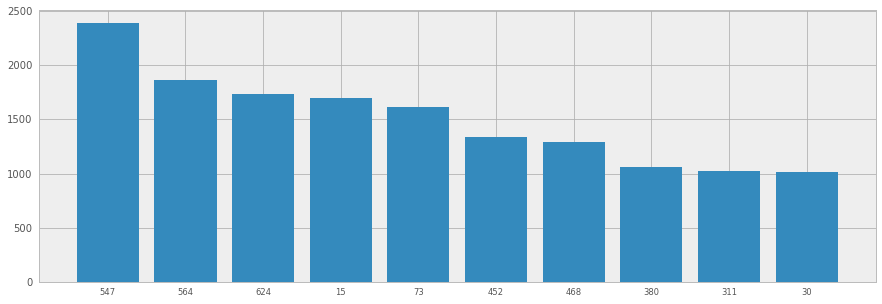

In [26]:
plt.bar(range(len(countListIdUser)), countListIdUser, align='center')
plt.xticks(range(len(countListIdUser)), listIdUser, size='small')
plt.show()